# 주제 : 오늘 밤 유럽 축구, 어디가 이길까? 데이터로 분석하고 내기를 이겨보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 European Soccer Database 데이터셋을 사용합니다.
    
    - 다음 1개의 sqlite 데이터베이스를 사용합니다.
    database.sqlite

    - 데이터 베이스 내 총 7개의 Table을 사용합니다.
    Country: 국가 정보
    League: 리그 정보
    Match: 경기 정보 (주 데이터셋)
    Player: 플레이어 정보
    Player_Attributes: 플레이어의 특성
    Team: 팀 정보
    Team_Attributes: 팀의 특성
    
- 데이터 출처: https://www.kaggle.com/hugomathien/soccer

## 최종 목표
    - SQL 데이터셋에서 테이블을 읽어들이는 방법 이해
    - 여러개의 테이블을 통합하는 방법 이해
    - 수 많은 데이터로부터 관심있는 데이터를 식별
    - 학습된 모델로부터 인사이트 습득 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 데이터베이스와 SQL

### 데이터베이스란


### SQL과 Query


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] ='smaug4474'

os.environ['KAGGLE_KEY'] =''


### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

!kaggle datasets download -d hugomathien/soccer
!unzip '*.zip'



 92% 30.0M/32.7M [00:00<00:00, 166MB/s] 
100% 32.7M/32.7M [00:00<00:00, 155MB/s]
Archive:  soccer.zip
  inflating: database.sqlite         


### 문제 3. sqlite3와 Pandas로 sqlite 데이터베이스 읽어들이기


In [5]:
import sqlite3

In [6]:
conn = sqlite3.connect("/content/database.sqlite")

cur = conn.cursor()

cur.execute("SELECT * FROM sqlite_master")

rows = cur.fetchall()

for row in rows:
    print(row)


('table', 'sqlite_sequence', 'sqlite_sequence', 4, 'CREATE TABLE sqlite_sequence(name,seq)')
('table', 'Player_Attributes', 'Player_Attributes', 11, 'CREATE TABLE "Player_Attributes" (\n\t`id`\tINTEGER PRIMARY KEY AUTOINCREMENT,\n\t`player_fifa_api_id`\tINTEGER,\n\t`player_api_id`\tINTEGER,\n\t`date`\tTEXT,\n\t`overall_rating`\tINTEGER,\n\t`potential`\tINTEGER,\n\t`preferred_foot`\tTEXT,\n\t`attacking_work_rate`\tTEXT,\n\t`defensive_work_rate`\tTEXT,\n\t`crossing`\tINTEGER,\n\t`finishing`\tINTEGER,\n\t`heading_accuracy`\tINTEGER,\n\t`short_passing`\tINTEGER,\n\t`volleys`\tINTEGER,\n\t`dribbling`\tINTEGER,\n\t`curve`\tINTEGER,\n\t`free_kick_accuracy`\tINTEGER,\n\t`long_passing`\tINTEGER,\n\t`ball_control`\tINTEGER,\n\t`acceleration`\tINTEGER,\n\t`sprint_speed`\tINTEGER,\n\t`agility`\tINTEGER,\n\t`reactions`\tINTEGER,\n\t`balance`\tINTEGER,\n\t`shot_power`\tINTEGER,\n\t`jumping`\tINTEGER,\n\t`stamina`\tINTEGER,\n\t`strength`\tINTEGER,\n\t`long_shots`\tINTEGER,\n\t`aggression`\tINTEGER,\n

In [7]:
# sqlite3.connect()와 pd.read_sql_query()로 csv파일 읽어들이기
conn = sqlite3.connect("/content/database.sqlite")
df_country = pd.read_sql_query('SELECT * FROM Country',conn)
df_league = pd.read_sql_query('SELECT * FROM League',conn)
df_match = pd.read_sql_query('SELECT * FROM Match',conn)
df_player = pd.read_sql_query('SELECT * FROM Player',conn)
df_player_att =  pd.read_sql_query('SELECT * FROM Player_Attributes',conn)
df_team = pd.read_sql_query('SELECT * FROM Team',conn)
df_team_att = pd.read_sql_query('SELECT * FROM Team_Attributes',conn)

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 각 데이터프레임의 구조 파악하기


In [10]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
print(df_country.head())
print(df_league.head())
print(df_match.head())
print(df_player.head())
print(df_player_att.head())
print(df_team.head())
print(df_team_att.head())

      id     name
0      1  Belgium
1   1729  England
2   4769   France
3   7809  Germany
4  10257    Italy
      id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A
   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1        492474             10000          

In [11]:
df_match.drop(df_match.columns[-38:],axis=1,inplace=True)

In [12]:
df_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,563066.0,8800.0,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,114792.0,150007.0,178119.0,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,67349.0,202663.0,32597.0,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,121080.0,197757.0,260964.0,231614.0,113235.0,41116.0,462608.0,42262.0,92252.0,194532.0


### 문제 5. 데이터프레임간의 관계 파악하기


In [13]:
# 데이터프레임 간 중복되는 Column이 있는지 확인하고 유용한 Column 식별하기
# Hint) unique()로 값을 비교하거나, map() 등을 활용하여 Column 관계를 확인
df_player_att['player_api_id'].value_counts()


41269     56
210278    56
42116     55
26472     54
179795    53
          ..
33688      2
470720     2
37366      2
9144       2
240561     2
Name: player_api_id, Length: 11060, dtype: int64

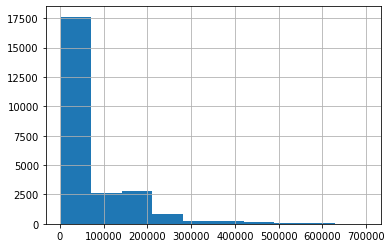

In [14]:
df_match['away_player_1'].hist()

In [15]:
df_match['away_player_1'].dropna().apply(int).map(df_player_att.groupby('player_api_id').mean()['overall_rating']).isna().sum()

0

In [16]:
df_team_att['team_api_id'].value_counts()

8588      6
8640      6
9864      6
8661      6
8456      6
         ..
8262      1
6351      1
8242      1
274581    1
6631      1
Name: team_api_id, Length: 288, dtype: int64

In [17]:
df_match['home_team_api_id'].map(df_team_att.groupby('team_api_id').mean()['buildUpPlaySpeed']).isna().sum()

178

### 문제 6. 선수 특성 사이의 상관성 파악하기

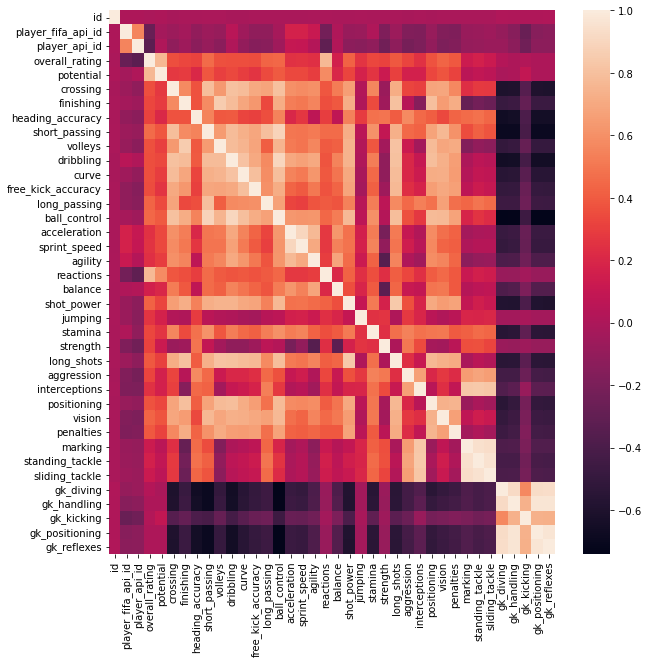

In [21]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_player_att.corr())




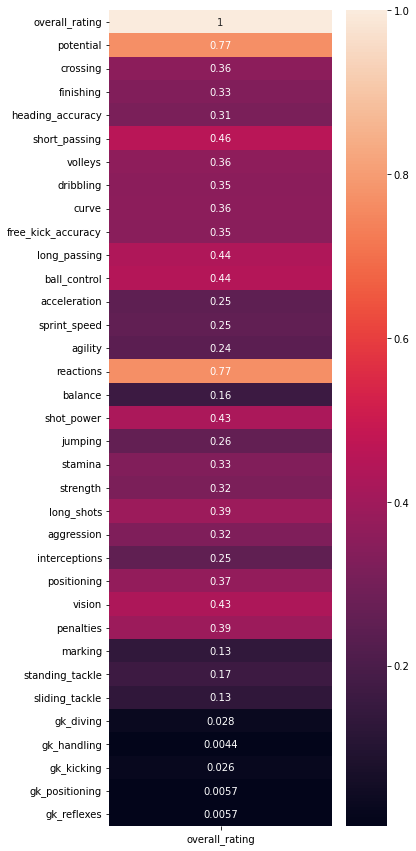

In [22]:
fig = plt.figure(figsize=(5,15))
sns.heatmap(df_player_att.drop(['id', 'player_fifa_api_id', 'player_api_id'], axis=1).corr()[['overall_rating']], annot=True)

### 문제 7. 매치 데이터프레임에 팀 특성 데이터프레임 통합하기


In [23]:
# DataFrame의 map() 메소드를 활용하여 데이터프레임 통합하기
df_team_att.columns





Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [24]:
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [25]:
df_team_att.drop('buildUpPlayDribbling', axis=1, inplace=True)

In [27]:
def most(x):
  return x.value_counts().index[0]

In [28]:
team_map = df_team_att.groupby('team_api_id').aggregate(
    {
       'buildUpPlaySpeed': 'mean',
       'buildUpPlaySpeedClass': most,
       'buildUpPlayDribblingClass': most,
       'buildUpPlayPassing': 'mean',
       'buildUpPlayPassingClass': most,
       'buildUpPlayPositioningClass': most,
       'chanceCreationPassing': 'mean',
       'chanceCreationPassingClass': most,
       'chanceCreationCrossing': 'mean',
       'chanceCreationCrossingClass': most,
       'chanceCreationShooting': 'mean',
       'chanceCreationShootingClass': most,
       'chanceCreationPositioningClass': most,
       'defencePressure': 'mean',
       'defencePressureClass': most,
       'defenceAggression': 'mean',
       'defenceAggressionClass': most,
       'defenceTeamWidth': 'mean',
       'defenceTeamWidthClass': most,
       'defenceDefenderLineClass': most
    }
)

In [29]:
team_map

,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
team_api_id,,,,,,,,,,,,,,,,,,,,
1601,47.333333,Balanced,Little,46.166667,Mixed,Organised,55.500000,Normal,60.333333,Normal,53.500000,Normal,Organised,47.166667,Medium,47.333333,Press,49.333333,Normal,Cover
1773,52.000000,Balanced,Little,50.000000,Mixed,Organised,50.000000,Normal,53.000000,Normal,54.000000,Normal,Organised,43.000000,Medium,44.000000,Press,50.000000,Normal,Cover
1957,47.166667,Balanced,Little,52.666667,Mixed,Organised,50.833333,Normal,36.333333,Normal,67.000000,Lots,Organised,49.333333,Medium,56.333333,Press,53.666667,Normal,Cover
2033,49.000000,Balanced,Little,48.400000,Mixed,Organised,51.800000,Normal,44.200000,Normal,48.200000,Normal,Free Form,42.200000,Medium,33.800000,Contain,45.400000,Normal,Cover
2182,60.333333,Balanced,Little,49.000000,Mixed,Organised,56.666667,Normal,57.333333,Normal,68.000000,Lots,Organised,51.666667,Medium,48.500000,Press,54.500000,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10281,52.833333,Balanced,Little,53.666667,Mixed,Organised,50.333333,Normal,59.166667,Lots,50.333333,Normal,Organised,45.500000,Medium,51.166667,Press,52.666667,Normal,Cover
108893,43.166667,Balanced,Little,53.166667,Mixed,Organised,46.000000,Normal,38.333333,Normal,39.500000,Normal,Organised,38.333333,Medium,46.000000,Press,46.333333,Normal,Cover
158085,67.000000,Fast,Normal,39.000000,Mixed,Organised,55.000000,Normal,59.000000,Normal,46.000000,Normal,Organised,36.000000,Medium,38.000000,Press,37.000000,Normal,Cover


In [30]:
df = df_match[['home_team_goal', 'away_team_goal']].copy()

In [32]:
for team in ['home_', 'away_']:
  team_map.index.name = team + 'team_api_id'
  for col in team_map.columns:
    df[team + col] = df_match[team_map.index.name].map(team_map[col])

In [34]:
df.dropna(inplace=True)

In [35]:
df.head()

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,...,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,...,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,...,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,...,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,...,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover
5,1,1,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,...,47.666667,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover


### 문제 8. 홈과 어웨이의 골 수를 승-무-패 범주로 변환하기

In [36]:
# 홈과 어웨이의 골 수를 범주형 데이터로 변환하기 (0: 홈팀 승, 1: 무승부, 2: 어웨이팀 승)
df['matchResult'] = df[['home_team_goal', 'away_team_goal']].aggregate(lambda x: 0 if x[0] > x[1] else 1 if x[0] == x[1] else 2, axis=1)

In [37]:
df.drop(['home_team_goal', 'away_team_goal'], axis=1, inplace=True)
df

,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,...,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,matchResult
0,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,52.333333,Normal,...,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover,1
1,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,49.333333,Normal,...,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover,1
2,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,60.333333,Normal,...,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover,2
3,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,64.666667,Normal,...,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover,0
5,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.500000,Normal,49.833333,Normal,...,Normal,Organised,53.666667,Medium,53.833333,Press,54.666667,Normal,Cover,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,56.833333,Balanced,Little,50.000000,Mixed,Organised,48.000000,Normal,55.166667,Normal,...,Normal,Organised,45.000000,Medium,42.800000,Press,51.600000,Normal,Cover,1
25974,47.600000,Balanced,Little,51.800000,Mixed,Organised,39.800000,Normal,45.200000,Normal,...,Normal,Organised,45.000000,Medium,42.800000,Press,51.600000,Normal,Cover,0
25975,53.000000,Balanced,Little,56.000000,Mixed,Organised,38.000000,Normal,53.000000,Normal,...,Normal,Organised,48.000000,Medium,48.333333,Press,50.333333,Normal,Cover,2
25976,49.500000,Balanced,Little,53.166667,Mixed,Organised,53.000000,Normal,58.666667,Normal,...,Normal,Organised,42.666667,Medium,43.833333,Press,50.000000,Normal,Cover,0


## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 9. get_dummies를 이용하여 범주형 데이터 전처리하기

In [38]:

col_cats = list(filter(lambda s: s.find('Class') >= 0, df.columns))
df_cats = pd.get_dummies(df[col_cats], drop_first=True)
df_cats




,home_buildUpPlaySpeedClass_Fast,home_buildUpPlaySpeedClass_Slow,home_buildUpPlayDribblingClass_Normal,home_buildUpPlayPassingClass_Mixed,home_buildUpPlayPassingClass_Short,home_buildUpPlayPositioningClass_Organised,home_chanceCreationPassingClass_Risky,home_chanceCreationPassingClass_Safe,home_chanceCreationCrossingClass_Lots,home_chanceCreationCrossingClass_Normal,...,away_chanceCreationCrossingClass_Normal,away_chanceCreationShootingClass_Normal,away_chanceCreationPositioningClass_Organised,away_defencePressureClass_High,away_defencePressureClass_Medium,away_defenceAggressionClass_Double,away_defenceAggressionClass_Press,away_defenceTeamWidthClass_Normal,away_defenceTeamWidthClass_Wide,away_defenceDefenderLineClass_Offside Trap
0,0,0,0,1,0,1,0,0,0,1,...,1,1,1,0,1,0,1,0,1,0
1,0,0,0,1,0,1,0,0,0,1,...,1,1,1,0,1,0,1,1,0,0
2,0,0,0,1,0,1,0,0,0,1,...,1,1,1,0,1,0,1,1,0,0
3,0,0,0,1,0,1,0,0,0,1,...,0,1,1,0,1,0,1,1,0,0
5,0,0,0,1,0,1,0,0,0,1,...,1,1,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25972,0,0,0,1,0,1,0,0,0,1,...,1,1,1,0,1,0,1,1,0,0
25974,0,0,0,1,0,1,0,0,0,1,...,1,1,1,0,1,0,1,1,0,0
25975,0,0,0,1,0,1,0,0,0,1,...,1,1,1,0,1,0,1,1,0,0
25976,0,0,0,1,0,1,0,0,0,1,...,1,1,1,0,1,0,1,1,0,0


### 문제 10. StandardScaler를 이용해 수치형 데이터 표준화하기


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
# Hint) Multicollinearity를 피하기 위해 불필요한 컬럼은 drop한다.

X_num = df.drop(['matchResult'] + col_cats, axis=1)
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)

X_cat = df_cats
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['matchResult']

### 문제 11. 학습데이터와 테스트데이터 분리하기


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 4. Classification 모델 학습하기


### 문제 12. Logistic Regression 모델 생성/학습하기


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)



LogisticRegression(max_iter=10000)

### 문제 13. 모델 학습 결과 평가하기


In [45]:
from sklearn.metrics import classification_report

In [46]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))



              precision    recall  f1-score   support

           0       0.49      0.87      0.63      3484
           1       0.24      0.00      0.00      1972
           2       0.44      0.31      0.36      2233

    accuracy                           0.48      7689
   macro avg       0.39      0.39      0.33      7689
weighted avg       0.41      0.48      0.39      7689



### 문제 14. XGBoost 모델 생성/학습하기


In [47]:
from xgboost import XGBClassifier

In [48]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)



XGBClassifier(objective='multi:softprob')

### 문제 15. 모델 학습 결과 평가하기


In [49]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))



              precision    recall  f1-score   support

           0       0.50      0.90      0.65      3484
           1       0.31      0.01      0.01      1972
           2       0.51      0.32      0.40      2233

    accuracy                           0.50      7689
   macro avg       0.44      0.41      0.35      7689
weighted avg       0.46      0.50      0.41      7689



## Step5 모델 학습 결과 심화 분석하기


### 문제 16. Logistic Regression 모델 계수로 상관성 파악하기

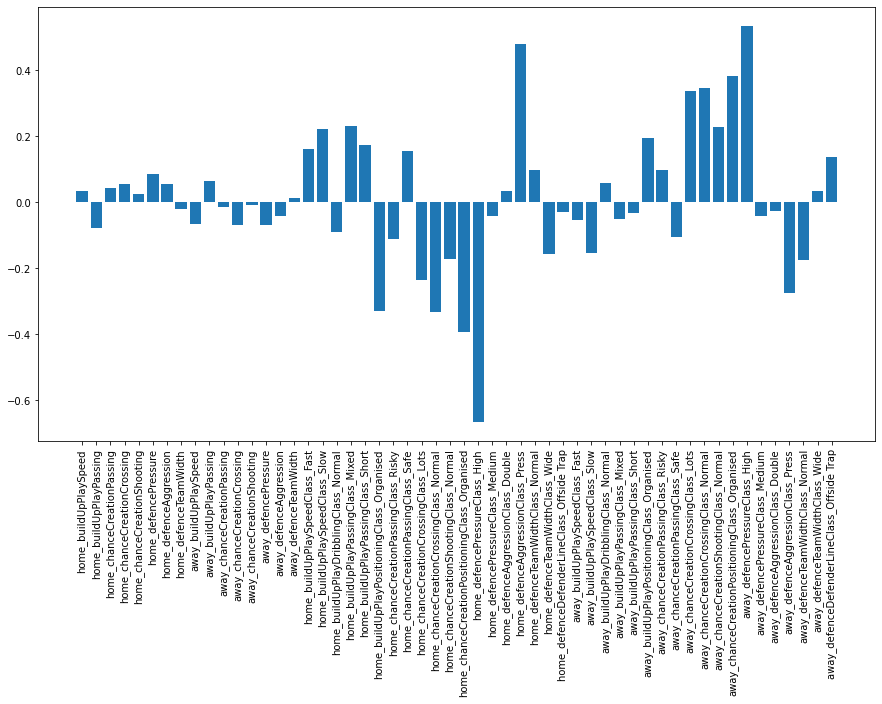

In [50]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15,8))
plt.bar(X.columns,model_lr.coef_[0,:])
plt.xticks(rotation=90)
plt.show()




### 문제 17. XGBoost 모델로 특징의 중요도 확인하기

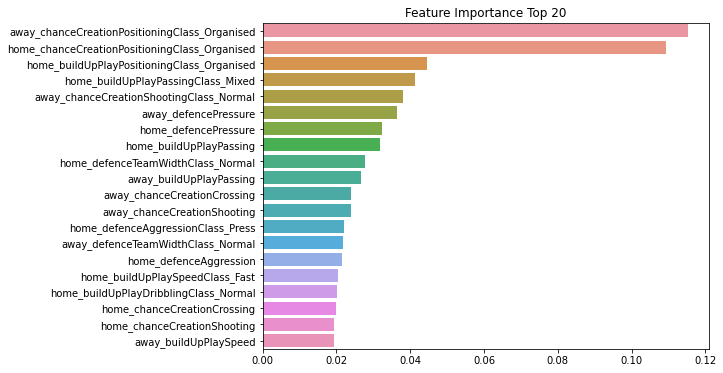

In [51]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
ft_importance_values = model_xgb.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()




## Step6 모델 성능 개선하기


### 문제 18. 매치 데이터프레임에 선수 특성 데이터프레임 통합하기

In [53]:
# 선수 특성 중 유의미한 정보를 매치 데이터프레임에 통합하기

df = df_match[['home_team_goal', 'away_team_goal']].copy()

for team in ['home_', 'away_']:
  team_map.index.name = team + 'team_api_id'
  for col in team_map.columns:
    df[team + col] = df_match[team_map.index.name].map(team_map[col])
df

,home_team_goal,away_team_goal,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,...,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass
0,1,1,56.333333,Balanced,Little,44.333333,Mixed,Organised,55.666667,Normal,...,53.750000,Normal,Organised,48.250000,Medium,49.000000,Press,58.750000,Wide,Cover
1,0,0,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.000000,Normal,...,54.333333,Normal,Organised,48.833333,Medium,55.166667,Press,55.500000,Normal,Cover
2,0,3,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.000000,Normal,...,51.333333,Normal,Organised,59.666667,Medium,47.666667,Press,63.833333,Normal,Cover
3,5,0,54.166667,Balanced,Little,46.333333,Mixed,Organised,44.500000,Normal,...,46.000000,Normal,Organised,46.000000,Medium,45.000000,Press,47.000000,Normal,Cover
4,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.333333,Normal,Organised,51.500000,Medium,57.500000,Press,56.500000,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1,0,47.600000,Balanced,Little,51.800000,Mixed,Organised,39.800000,Normal,...,59.000000,Normal,Organised,45.000000,Medium,42.800000,Press,51.600000,Normal,Cover
25975,1,2,53.000000,Balanced,Little,56.000000,Mixed,Organised,38.000000,Normal,...,61.000000,Normal,Organised,48.000000,Medium,48.333333,Press,50.333333,Normal,Cover
25976,2,0,49.500000,Balanced,Little,53.166667,Mixed,Organised,53.000000,Normal,...,54.333333,Normal,Organised,42.666667,Medium,43.833333,Press,50.000000,Normal,Cover
25977,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.500000,Normal,Organised,48.666667,Medium,46.000000,Press,55.666667,Normal,Cover


In [54]:
player_map = df_player_att.groupby('player_api_id').mean()['overall_rating']
player_map

player_api_id
2625      60.142857
2752      69.380952
2768      69.285714
2770      71.133333
2790      70.200000
            ...    
744907    51.909091
746419    59.000000
748432    58.000000
750435    56.444444
750584    58.000000
Name: overall_rating, Length: 11060, dtype: float64

In [68]:
for col in (s + str(idx) for s in ['home_player_', 'away_player_'] for idx in range(1, 12)):
  df[col + '_rating']= df_match[col].map(player_map)

In [70]:
df.dropna(inplace=True)

In [74]:
df['matchResult'] = df[['home_team_goal', 'away_team_goal']].aggregate(lambda x: 0 if x[0] > x[1] else 1 if x[0] == x[1] else 2, axis=1)
df.drop(['home_team_goal', 'away_team_goal'], axis=1, inplace=True)

In [75]:
df.head()

,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,...,away_player_3_rating,away_player_4_rating,away_player_5_rating,away_player_6_rating,away_player_7_rating,away_player_8_rating,away_player_9_rating,away_player_10_rating,away_player_11_rating,matchResult
145,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.5,Normal,49.833333,Normal,...,60.750000,66.750000,70.185185,69.333333,68.000000,65.000000,71.666667,64.611111,71.826087,0
153,53.666667,Balanced,Little,44.166667,Mixed,Organised,59.0,Normal,60.333333,Normal,...,70.375000,69.888889,70.720000,68.444444,68.541667,71.739130,71.190476,69.714286,69.130435,2
155,51.333333,Balanced,Little,45.166667,Mixed,Organised,63.5,Risky,55.000000,Normal,...,61.750000,63.722222,63.411765,64.714286,68.000000,70.521739,67.500000,65.666667,66.083333,0
162,56.666667,Balanced,Little,47.333333,Mixed,Organised,47.5,Normal,49.833333,Normal,...,72.166667,64.100000,69.407407,72.107143,69.240000,79.692308,77.972973,71.416667,70.896552,0
168,55.500000,Balanced,Little,52.666667,Mixed,Organised,50.0,Normal,49.333333,Normal,...,58.333333,54.600000,62.333333,58.666667,65.800000,58.750000,74.928571,63.000000,67.111111,1


### 문제 19. 모델 재학습하여 평가하기